<a href="https://colab.research.google.com/github/Geethaganbattula/fmml_labs/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [14]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-14-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [15]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [16]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [17]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [18]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.34390158143724614
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [19]:
split_accuracies = []
av_accuracies = []

def MyAverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0

  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    split_accuracy = Accuracy(vallabel, valpred)
    split_accuracies.append(split_accuracy)
    print(f"Split number {ii} has validation accuracy = {split_accuracy}")
    accuracy += split_accuracy
  return accuracy/iterations # average of all accuracies

for i in range(5):
  avg_accuracy = MyAverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
  av_accuracies.append(avg_accuracy)
  print('Average validation accuracy is ', avg_accuracy)
  print("----------------------------------------")

testpred = NN(alltraindata, alltrainlabel, testdata)
print('Test accuracy is ', Accuracy(testlabel, testpred))

Split number 0 has validation accuracy = 0.34185149469623916
Split number 1 has validation accuracy = 0.3510956175298805
Split number 2 has validation accuracy = 0.3497725640411779
Split number 3 has validation accuracy = 0.3270257156720039
Split number 4 has validation accuracy = 0.3316737790422001
Split number 5 has validation accuracy = 0.3352926769532207
Split number 6 has validation accuracy = 0.33235867446393763
Split number 7 has validation accuracy = 0.34019370460048426
Split number 8 has validation accuracy = 0.3485812133072407
Split number 9 has validation accuracy = 0.3392423506556581
Average validation accuracy is  0.3397087790962042
----------------------------------------
Split number 0 has validation accuracy = 0.3364325911426474
Split number 1 has validation accuracy = 0.3335807968324672
Split number 2 has validation accuracy = 0.3390485390002415
Split number 3 has validation accuracy = 0.34741442097596503
Split number 4 has validation accuracy = 0.3440727988194786
Spli

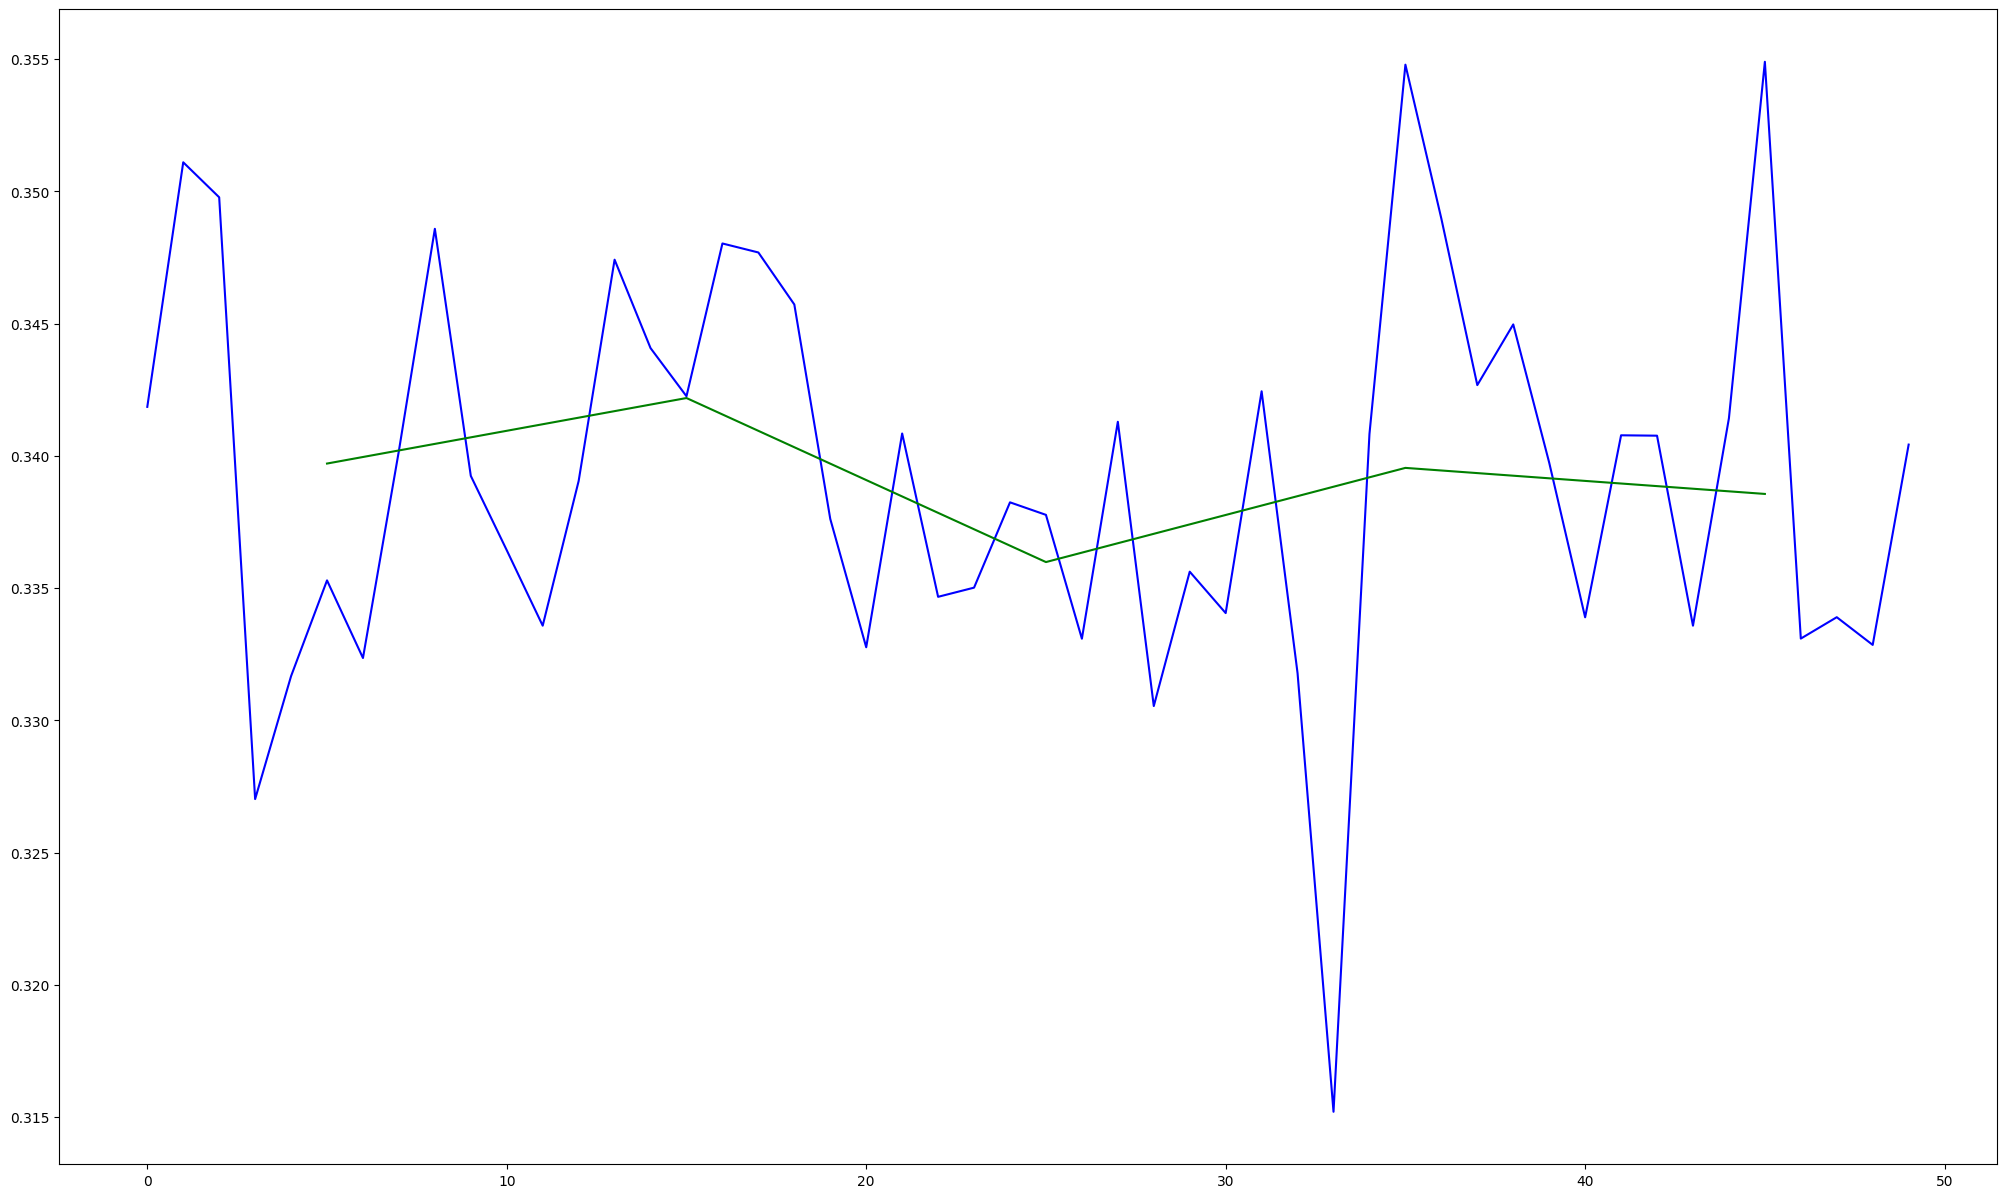

In [20]:
#CODE FOR 1ST QUESTION
plt.figure(figsize = (25,15))
plt.plot(split_accuracies, label = 'Split Accuracy', color = 'blue')
plt.plot([5, 15, 25, 35, 45], av_accuracies, label = 'Average Validation Accuracy', color = 'green')
plt.show()

Yes averaging the validation accuracy across multiple splits give more consistent results.we can see the above graph that the validation accuracy varies a lot with different splits and the average validation accuracy almost stays constant.so it give more consistent result.

# answer for third question

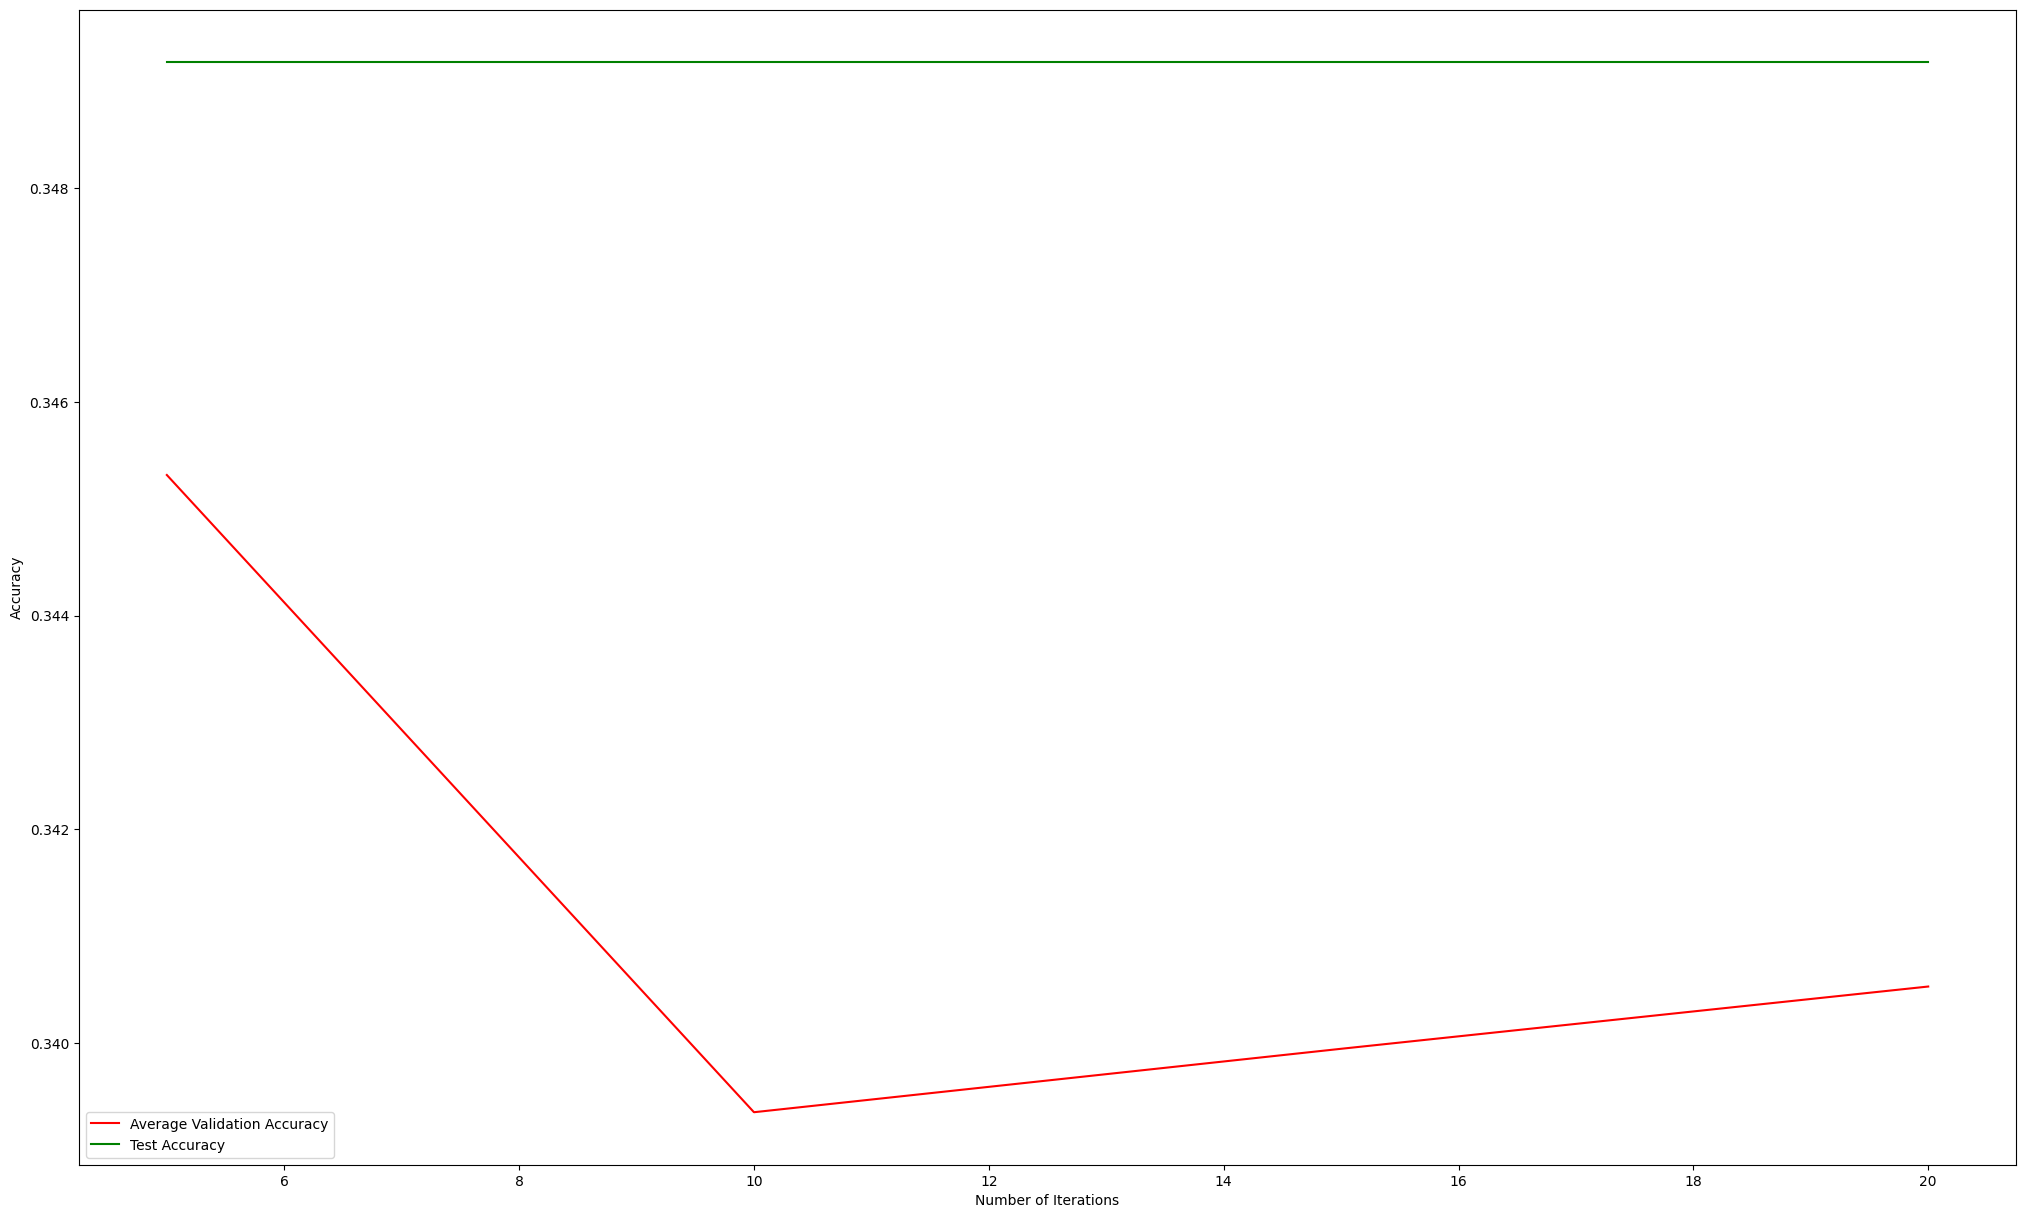

In [ ]:
#CODE FOR 3RD QUESTION
avg_accuracy_iter = []
iterations_list = [5, 10, 15, 20]

for i in iterations_list:
  avg_accuracy_iter.append(AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))

plt.figure(figsize = (25,15))
plt.plot(iterations_list, avg_accuracy_iter, label = 'Average Validation Accuracy', color = 'red')
plt.plot(iterations_list, np.ones(len(avg_accuracy_iter)) * Accuracy(testlabel, testpred), label = 'Test Accuracy', color = 'green')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

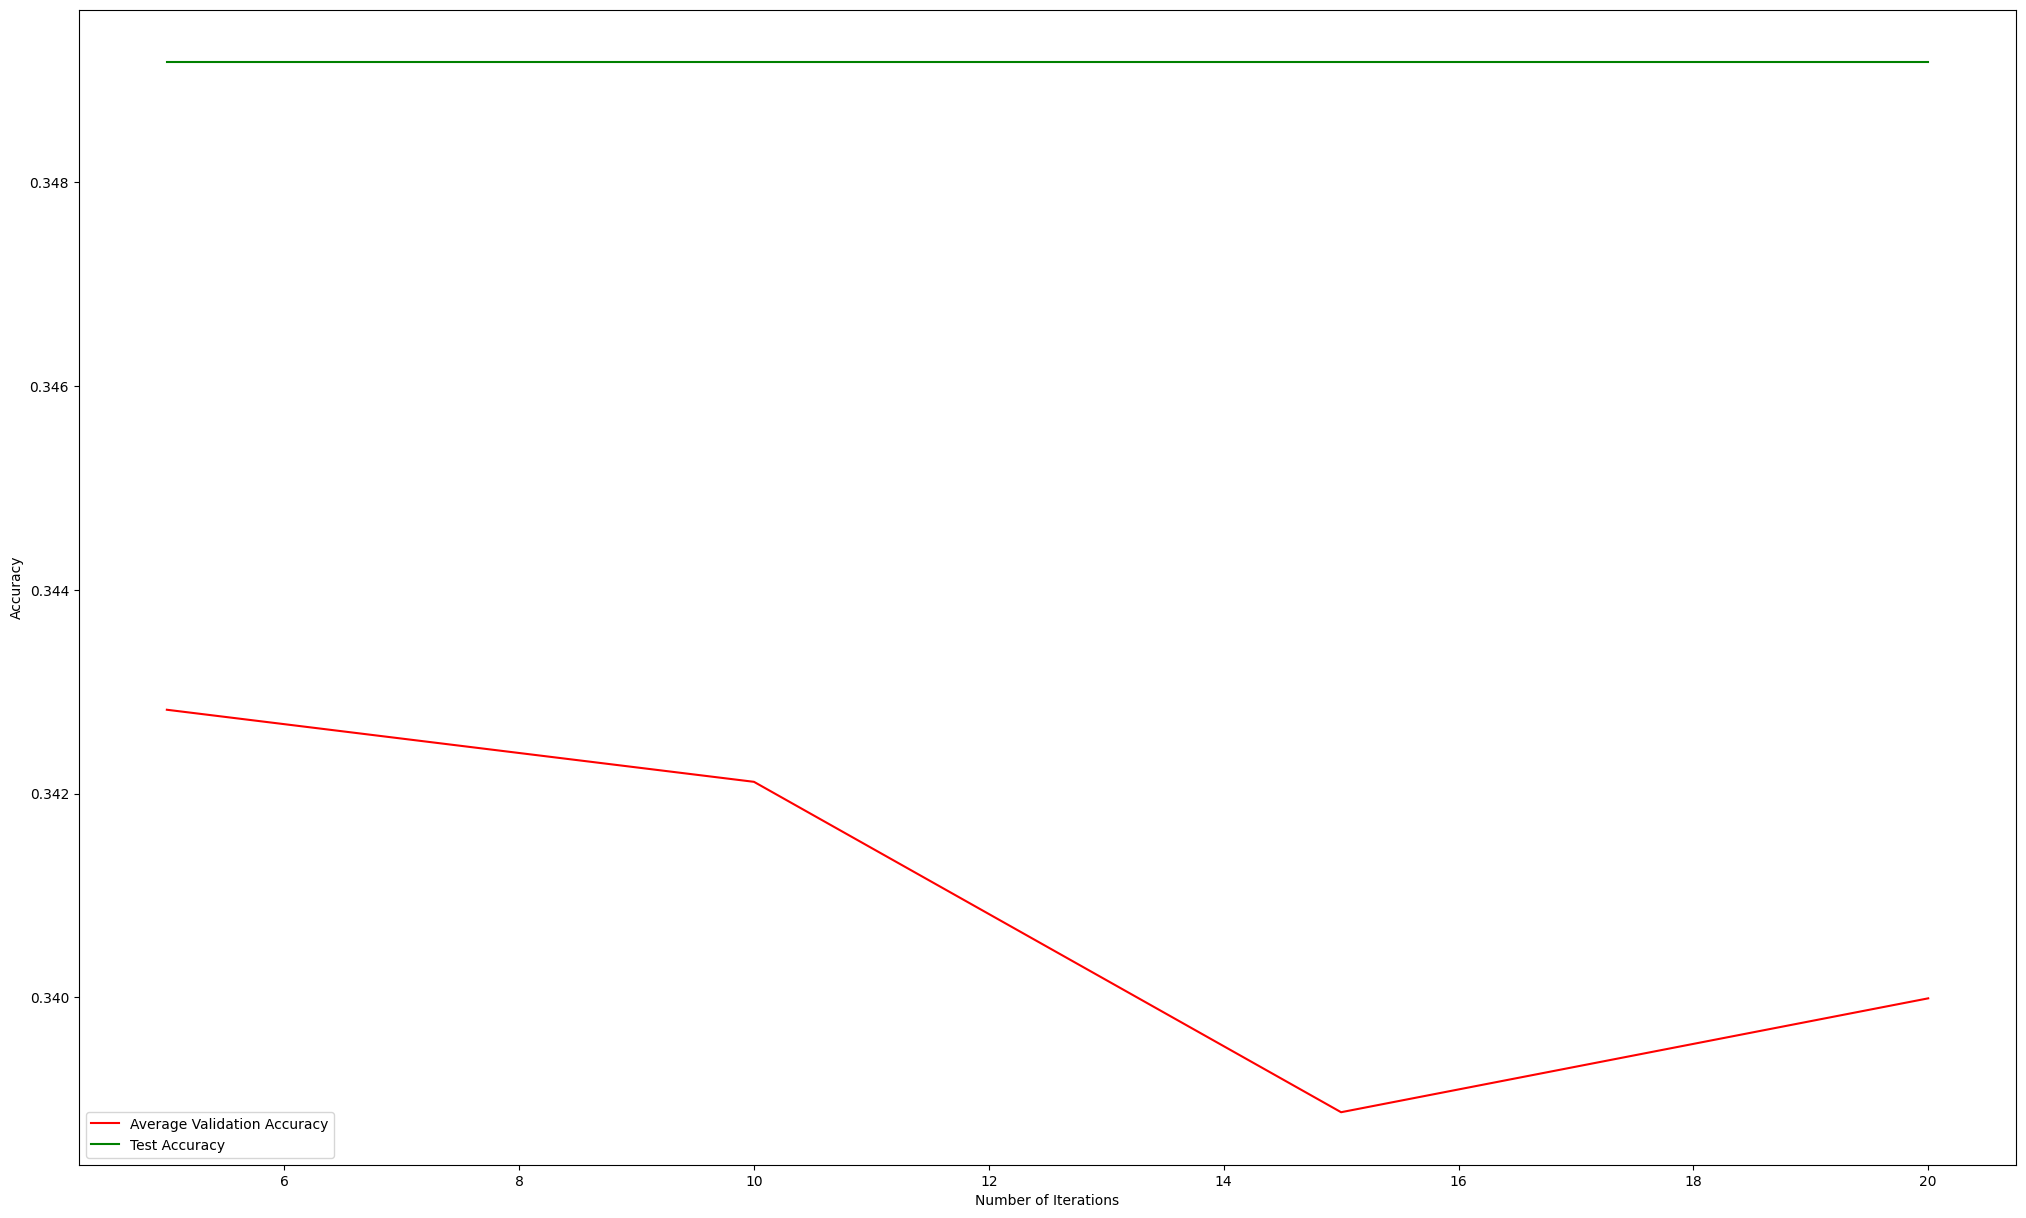

In [21]:
#CODE FOR 3RD QUESTION
avg_accuracy_iter = []
iterations_list = [5, 10, 15, 20]

for i in iterations_list:
  avg_accuracy_iter.append(AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))

plt.figure(figsize = (25,15))
plt.plot(iterations_list, avg_accuracy_iter, label = 'Average Validation Accuracy', color = 'red')
plt.plot(iterations_list, np.ones(len(avg_accuracy_iter)) * Accuracy(testlabel, testpred), label = 'Test Accuracy', color = 'green')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

If we increase the number of iterations, the accuracy will also increase.And saturate very quickly as we can see above plotted graph

# answer for fourth question

If we deal with a very small train dataset or validation dataset by increasing the iterations it won't have a significant impact. If the training data set is reduced the accuracy will reduce too and vice versa. But if the test data is reduced, more training data will be considered and the accuracy will increase (inversely proportional).

Now let us see how augmentation affects accuracy. We will pick components from what we studied in the last module we will experiment with MNIST dataset

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])

11490434/11490434 [==============================] - 1s 0us/step
(28, 28) 5


In [23]:
train_X = train_X/255
test_X = test_X/255

#train_X[0].shape, train_X[0]

In [24]:
train_X = train_X[::1200,:,:].copy() # subsample. Otherwise it will take too long!
train_y = train_y[::1200].copy() # do the same to the labels

In [25]:
## Augmentation functions:



def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample

  print("shape of sample before is:", sample.shape)
  print("len(sample.shape)", len(sample.shape))
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
    print("shape of sample is:", sample.shape)
  angle = rng.random(len(sample)) # generate random numbers for angles
  print("angle is:", angle)
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  print("angle with constraint is:", angle)
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [26]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount) # create the shear transform
  img = warp(sample, tform) # apply the shear
  # this makes the digit off-center. Since all the images in the test set are centralized, we will do the same here
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample) # take care if the input had only one sample.


In this lab, we will use the image pixels themselves as features, instead of extracting features. Each image has 28*28 pixels, so we will flatten them to 784 pixels to use as features. Note that this is very compute intensive and will take a long time.

Let us check the baseline accuracy on the test set without any augmentations. We hope that adding augmentations will help us to get better results.

In [27]:

testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))


Baseline accuracy without augmentation is  0.6472


Let us try to improve this accuracy using augmentations. When we create augmentations, we have to make sure that the changes reflect what will naturally occur in the dataset. For example, we should not add colour to our samples as an augmentation because they do not naturally occur. We should not also flip the images in MNIST, because flipped images have different meanings for digits.

Let us augment the whole dataset and see if this improves the test accuracy

In [30]:

# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint))) # concatenate the augmented data to the set
  auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.0338778  0.68301496 0.95049627 0.82915049 0.27719814 0.05332508
 0.94035141 0.93706272 0.53241532 0.64231741 0.46260006 0.41976537
 0.11944844 0.0967529  0.23273215 0.83664075 0.1458323  0.22669865
 0.54861406 0.21513122 0.16320668 0.56331624 0.36809327 0.62615929
 0.91220534 0.15099313 0.91343366 0.90248997 0.82908758 0.63128592
 0.62014666 0.63921266 0.69049555 0.0164822  0.95809258 0.58560376
 0.78146584 0.37728184 0.01239721 0.50973466 0.50719012 0.43698929
 0.33971705 0.24982609 0.52754487 0.37527814 0.96993188 0.17292731
 0.31966557 0.29396047]
angle with constraint is: [-27.96733229  10.98089739  27.02977619  19.74902942 -13.36811159
 -26.8004949   26.42108475  26.22376349   1.94491918   8.5390447
  -2.24399636  -4.81407797 -22.83309384 -24.1948261  -16.0360712
  20.19844478 -21.25006196 -16.39808089   2.91684356 -17.09212692
 -20.20759892   3.7989745   -7.91440374   7.56955715  24.73232042
 -20.94041211  2

In [31]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-31-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.22529734 0.72401225 0.83738348 0.08078536 0.88207771 0.7975172
 0.8696843  0.69842855 0.67415307 0.52509323 0.65278722 0.91910966
 0.100522   0.31576448 0.07245497 0.94480517 0.44526547 0.67534447
 0.84112006 0.99100025 0.16178246 0.79951261 0.8874229  0.04887538
 0.75409056 0.35472532 0.64859679 0.5140482  0.25974225 0.13522136
 0.11694723 0.10332286 0.63779004 0.35141085 0.21663344 0.69188509
 0.68684957 0.53916829 0.93495782 0.38541423 0.83586297 0.07513941
 0.73983109 0.98844741 0.84659822 0.57966472 0.62676606 0.35328955
 0.67948522 0.77039538]
angle with constraint is: [-2.74702661  2.24012252  3.37383478 -4.19214636  3.82077709  2.97517204
  3.69684296  1.98428555  1.74153067  0.25093233  1.52787224  4.19109665
 -3.99477999 -1.84235522 -4.27545026  4.44805172 -0.54734534  1.75344471
  3.41120065  4.91000248 -3.38217542  2.99512606  3.8742289

In [32]:
#Accuracy after rotation augmentation constrained by  90  is  0.6427

In [33]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90] # the values we want to test
accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here

for ii in range(len(angleconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-33-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
shape of sample before is: (50, 28, 28)
len(sample.shape) 3
angle is: [0.21814918 0.6629277  0.76686152 0.16663614 0.04385828 0.43958738
 0.77402409 0.65077984 0.70188172 0.40283934 0.23494555 0.53177884
 0.20436569 0.7262287  0.19696646 0.29126327 0.50654478 0.48670993
 0.60084938 0.4374446  0.91947331 0.83993409 0.87911345 0.62951657
 0.63500792 0.60919868 0.43488415 0.322106   0.59200289 0.02553184
 0.00745643 0.85164183 0.04642404 0.52479515 0.61498776 0.19817123
 0.89573084 0.19009577 0.88451499 0.76299027 0.24074295 0.15074417
 0.31623271 0.39795057 0.24578468 0.99889155 0.22965234 0.83063483
 0.15911775 0.98024463]
angle with constraint is: [-2.81850815  1.62927701  2.6686152  -3.33363857 -4.56141717 -0.60412625
  2.74024086  1.50779836  2.0188172  -0.9716066  -2.65054455  0.31778843
 -2.95634306  2.26228697 -3.03033544 -2.08736733  0.06544778 -0.13290066
  1.00849376 -0.625554    4.19473309  3.39934094  3.791134

Let us see the best value for angle constraint: (Ideally this should be done on validation set, not test set)

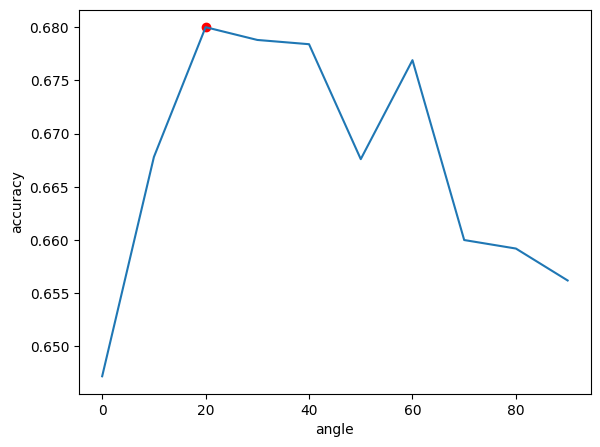

In [34]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

Let us do a grid search to find the best shear constraint.

In [35]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0] # the values we want to test
accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here

for ii in range(len(shearconstraints)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-35-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6145
Accuracy after shear augmentation constrained by  0.4  is  0.6258
Accuracy after shear augmentation constrained by  0.6  is  0.6357
Accuracy after shear augmentation constrained by  0.8  is  0.6511
Accuracy after shear augmentation constrained by  1.0  is  0.6507
Accuracy after shear augmentation constrained by  1.2  is  0.6403
Accuracy after shear augmentation constrained by  1.4  is  0.6534
Accuracy after shear augmentation constrained by  1.6  is  0.6257
Accuracy after shear augmentation constrained by  1.8  is  0.6039
Accuracy after shear augmentation constrained by  2.0  is  0.5916


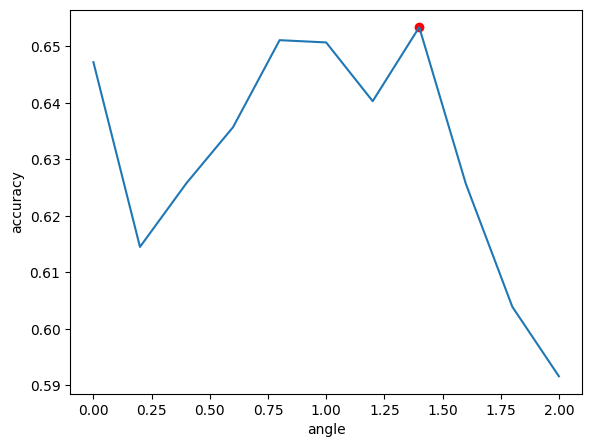

In [36]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

We can do multiple augmentations at the same time. Here is a function to do both shear and rotation to the sample. In this case, we will have two hyperparameters.

In [37]:

def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)  # make sure the sample is 3 dimensional
  amt = rng.random(len(sample)) # generate random numbers for shear
  amt = (amt-0.5)*shearconstraint # make the random shear constrained
  angle = rng.random(len(sample)) # generate random numbers for angles
  angle = (angle-0.5)*angleconstraint # make the random angle constrained
  nsample = sample.copy() # preallocate the augmented array to make it faster
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii]) # first apply shear, then rotate
  return np.squeeze(nsample) # take care if the input had only one sample.

Since we have two hyperparameters, we have to do the grid search on a 2 dimensional matrix. We can use our previous experience to inform where to search for the best hyperparameters.

In [38]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6] # the values we want to test
angleconstraints = [0,10,20,30,40,50,60] # the values we want to test
hyp = cartesian((shearconstraints, angleconstraints)) # cartesian product of both

accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here

for ii in range(len(hyp)):
  # create the augmented dataset
  augdata = train_X # we include the original images also in the augmented dataset
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))) # concatenate the augmented data to the set
    auglabel = np.concatenate((auglabel, train_y))  # the labels don't change when we augment

  # check the test accuracy
  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

<ipython-input-38-09de780976d0>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6154
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.6049
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.5913
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.6102
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.594
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6339
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.5967
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5832
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.5945
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.5905
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.6136
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.589
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6344
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.6076


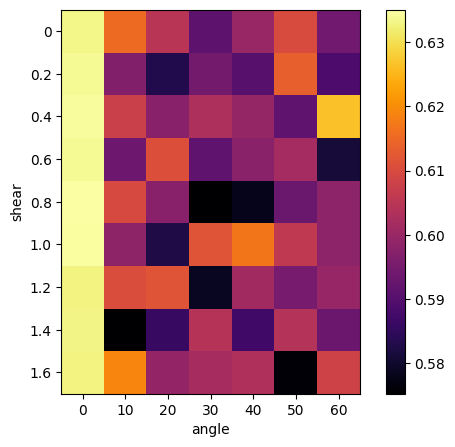

In [39]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)

It seems that rotation and shear don't mix! The best accuracy is when rotation is zero.

Questions

Questions
Try these questions for better understanding. You may not be able to solve all of them.

What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?
Can you increase the accuracy by increasing the number of augmentations from each sample?
Try implementing a few augmentations of your own and experimenting with them. A good reference is here.
Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

ANSWER FOR 1ST QUESTION

The beat values of shear constraint is 0.4,0.6,0.8,1.0,1.2,1.4,1.6 The best values of angle constraint is 0.0,0.0,0.0,0.0,0.0,0.0,10.0.

ANSWER FOR 2ND QUESTION

Yes,we increase the accuracy by increasing the number of augumentaions from each sample.

ANSWER FOR 3RD AND 4TH QUESTIONS



In [40]:
#answer for 3rd and 4th question
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random
from skimage import img_as_ubyte
import os
import matplotlib.pyplot as plt

#basic Function to display image side by side
def plot_side(img1, img2, title1, title2, cmap = None):
    fig = plt.figure(tight_layout='auto', figsize=(10, 7))
    fig.add_subplot(221)
    plt.title(title1)
    plt.imshow(img)
    fig.add_subplot(222)
    plt.title(title2)
    plt.imshow(img2, cmap = None)
    return fig

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0   8902      0 --:--:-- --:--:-- --:--:--  8890


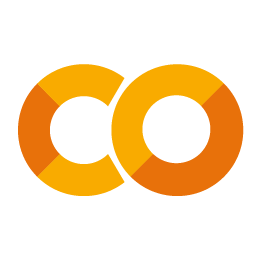

In [43]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

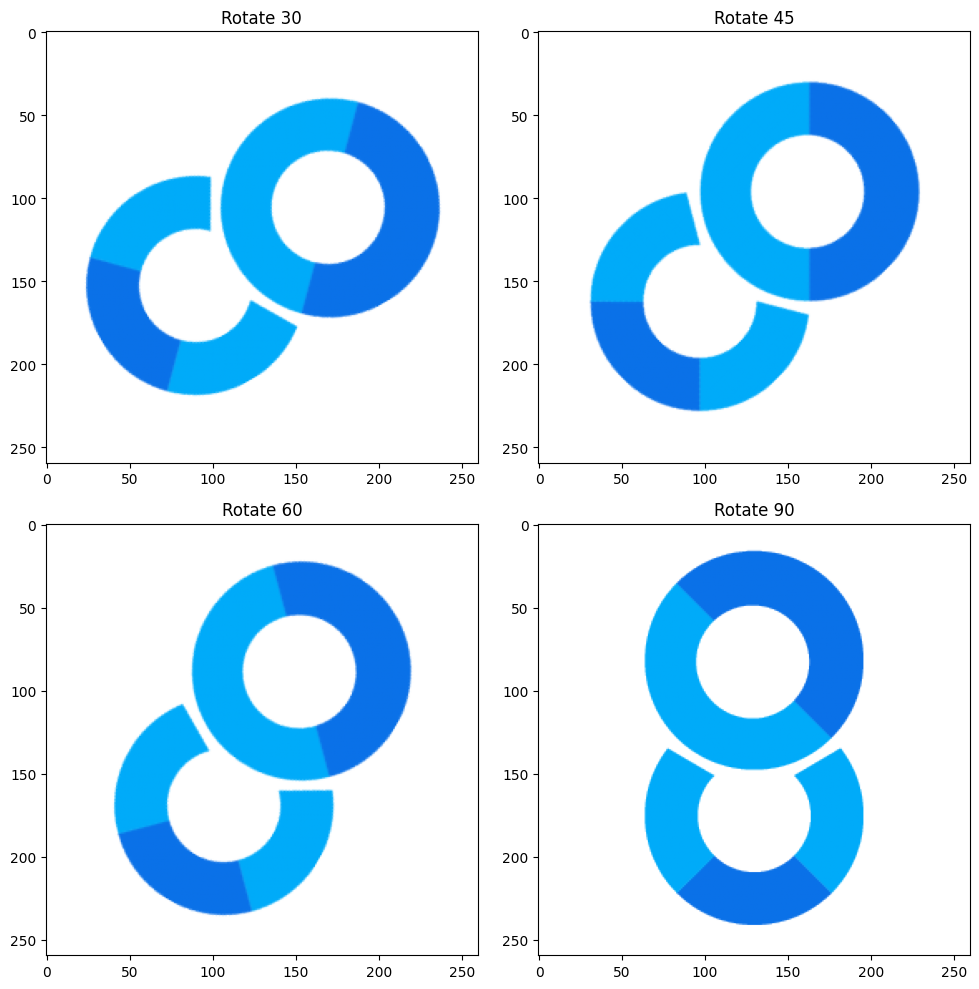

In [44]:
rotate30 = rotate(img, angle=30)
rotate45 = rotate(img, angle=45)
rotate60 = rotate(img, angle=60)
rotate90 = rotate(img, angle=90)
fig = plt.figure(tight_layout='auto', figsize=(10, 10))
fig.add_subplot(221)
plt.title('Rotate 30')
plt.imshow(rotate30)
fig.add_subplot(222)
plt.title('Rotate 45')
plt.imshow(rotate45)
fig.add_subplot(223)
plt.title('Rotate 60')
plt.imshow(rotate60)
fig.add_subplot(224)
plt.title('Rotate 90')
plt.imshow(rotate90)
plt.show()

